## Bank personal loan modelling

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Read loan data

data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
data.shape

(5000, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [13]:
# To check whether there is any null value
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### Dataset doesnt have any null values

In [15]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [22]:
# Find unique data in each column
data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [26]:
# There are negative values in Expierence column
data[data['Experience']<0]['Experience'].count()

52

In [27]:
# Clean the negative expience column
pos_exp = data.loc[data['Experience']>0]
neg_exp = data.Experience < 0
mylist = data.loc[neg_exp]['ID'].tolist() #getting customer id who has -ve exp


### The following code does the below steps:

1. For the record with the ID, get the value of Age column
2. For the record with the ID, get the value of Education column
3. Filter the records matching the above criteria from the data frame which has records with positive experience and take the median
4. Apply the median back to the location which had negative experience

In [30]:
for id in mylist:
    age = data.loc[np.where(data['ID'] == id)]['Age'].tolist()[0]
    education = data.loc[np.where(data['ID'] == id)]['Education'].tolist()[0]
    df_filtered = pos_exp[(pos_exp.Age == age) & (pos_exp.Education == education)]
    exp = df_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']== id)].index, 'Experience'] = exp


In [31]:
data[data['Experience']<0]['Experience'].count()

0

In [32]:
data.head(20)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13.0,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27.0,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24.0,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10.0,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9.0,180,93023,1,8.9,3,0,1,0,0,0,0


### EDA

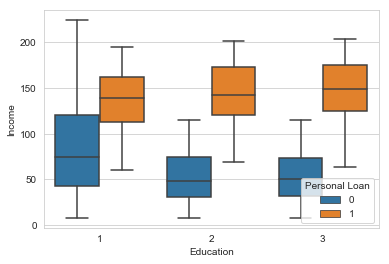

In [37]:
# Correlation between income and Education
sns.boxplot(x = 'Education', y ='Income', hue='Personal Loan', data = data)

#### Observation: 
Customers having education level 1 is having more income hence they have bought the loan.
however customers having less income are not buying the loan

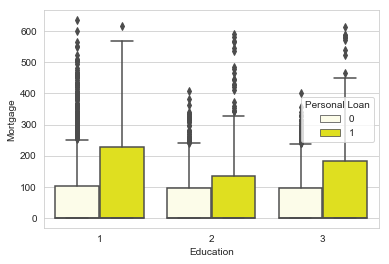

In [39]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data,color='yellow')

In [40]:
# Observation- Customer having personal loan has more mortgage

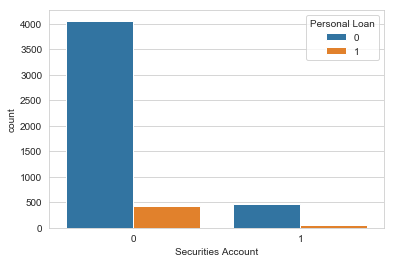

In [41]:
sns.set_style('whitegrid')
sns.countplot('Securities Account', hue = 'Personal Loan', data= data)

In [42]:
#Observation : Majority of customers who does not have loan have securities account

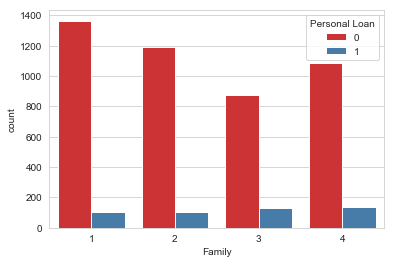

In [44]:
sns.countplot(x='Family',data=data,hue='Personal Loan',palette='Set1')

In [46]:
#Observation: Family size does not have any impact in personal loan. 
#But it seems families with size of 3 are more likely to take loan.

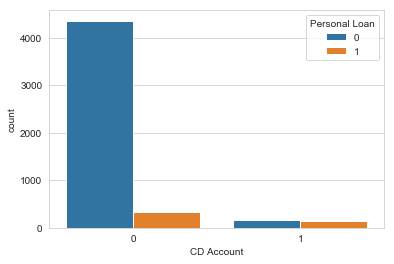

In [48]:
sns.countplot(x='CD Account',data=data,hue='Personal Loan')

In [49]:
#Observation: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

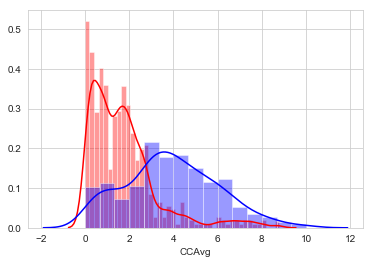

In [50]:
sns.distplot(data[data['Personal Loan']==0]['CCAvg'], color ='r')
sns.distplot(data[data['Personal Loan']==1]['CCAvg'], color ='b')

In [52]:
print('Credit card spending of Non-Loan customers: ',data[data['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', data[data['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


In [53]:
#Observation: The graph show persons who have personal loan have a higher credit card average.
#Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. 
#Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

Text(0,0.5,'Age')

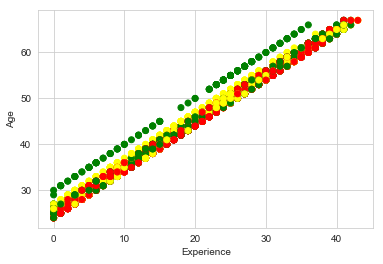

In [54]:
# Relation between Age, experience and education

colors = {1:'red', 2:'yellow',3:'green'}
plt.scatter(data['Experience'], data['Age'], c=data['Education'].apply(lambda x: colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

### Applying models

In [70]:
# Splitting dataset into train & test dataset

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data.drop(['ID','ZIP Code','Experience'], axis =1), test_size =0.2, random_state=100)


In [71]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

In [72]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_clf.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
dt_clf.score(test_set, test_labels)

0.98

In [92]:
test_set.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
789,29,31,4,0.3,2,0,0,0,1,0
2507,59,60,4,2.1,1,234,0,0,1,1
2376,58,23,3,0.2,1,0,0,0,0,0
1378,54,34,4,0.1,3,0,0,0,1,0
598,56,11,2,0.2,3,90,0,0,0,0


In [94]:
dt_clf.predict([[50, 190, 3,2.10,3, 240, 0,0, 1,0]]) #predicting customer will buy loan

array([1], dtype=int64)

In [95]:
dt_clf.predict([[53, 72, 2,1.50,2, 0, 0,0, 1,0]]) # predicting customer will not buy loan

array([0], dtype=int64)

In [88]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators =5, max_depth=2)
rf_clf.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [89]:
rf_clf.score(test_set, test_labels)

0.928

In [90]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(train_set, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [91]:
knn.score(test_set, test_labels)

0.899

## Conclusion
Decision Tree algorithm have the highest accuracy and we can choose that as our final model